In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

In [2]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

In [3]:
# Import the train set and test set
train_data = pd.read_csv("normalized_train_dataset_dis.csv", delimiter=",")
test_data = pd.read_csv("normalized_test_dataset_dis.csv", delimiter=",")

In [4]:
train_data.head()

,ID,DeviceFlag4G,DataArpu,DataAllowanceContinuous,DeviceFlagSmartphone,MonthlyVoiceTrafficCount,MonthlySMSTrafficCount,MonthlyDataTraffic,CustomerGender,CustomerExpatriate,...,Security,Streaming-Applications,Terminals,Unclassified,VoIP,Web-Applications,Region,Province,CustomerAge,Product
0,10511,0.0,0.186103,0.010514,1.0,0.028646,0.000250,0.006104,0.0,0.0,...,0.001731,0.378368,0.0,0.024176,0.006683,0.549398,0.0,93.0,35.000000,0
1,4174,1.0,0.108560,0.038148,1.0,0.133464,0.009238,0.015368,1.0,0.0,...,0.011461,0.102020,0.0,0.020124,0.011002,0.649518,0.0,71.0,55.000000,2
2,4920,1.0,0.108560,0.013367,1.0,0.037109,0.002622,0.020042,0.0,1.0,...,0.001541,0.231534,0.0,0.002384,0.004774,0.719529,0.0,42.0,45.000000,2
3,7007,0.0,0.108560,0.013367,0.0,0.037109,0.002622,0.020042,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,42.0,44.796877,2
4,4129,0.0,0.124069,0.016219,1.0,0.028646,0.001748,0.024390,0.0,0.0,...,0.000013,0.615545,0.0,0.000415,0.000474,0.365691,0.0,93.0,65.000000,0


In [5]:
prova = train_data
prova = prova.drop('DataArpu', axis=1)
prova = prova.drop('ID', axis=1)
prova = prova.iloc[np.random.permutation(len(prova))]
prova = prova.reset_index(drop=True)

In [6]:
array = np.asarray(prova)

X = array[:,0:prova.shape[1]-1]
X = np.asarray(X)
Y = array[:,prova.shape[1]-1]
Y = np.asarray(Y)

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X,Y)

In [8]:
# summarize scores
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(X)

[2.4e+01 2.6e+01 1.4e+01 8.7e+00 4.8e-01 8.1e+00 9.7e+01 3.1e+01 2.0e+06
 2.2e+00 3.4e+01 3.5e+01 3.9e+01 3.5e+01 6.4e+01 6.5e+01 1.1e+01 1.3e-01
 3.6e+00 2.2e+00 9.4e+00 2.3e-01 5.7e+00 3.0e+00 2.5e+00 2.0e+00 8.8e-01
 4.5e-01 6.9e+00 7.0e+01 2.1e+02 7.5e+01]


In [9]:
len(prova.columns)

33

In [10]:
def features_labels_split(data):
    
    features = data[['DeviceFlag4G', 'DataAllowanceContinuous', 'DeviceFlagSmartphone',
       'MonthlyVoiceTrafficCount', 'MonthlySMSTrafficCount',
       'MonthlyDataTraffic', 'CustomerGender', 'CustomerExpatriate', 'ZipCode',
       'ChurnScore', 'AirportConnectionsDuration', 'AirportConnectionsCount',
       'StationConnectionsDuration', 'StationConnectionsCount',
       'ParkingConnectionsDuration', 'ParkingConnectionsCount',
       'File-Transfer', 'Games', 'Instant-Messaging-Applications', 'Mail',
       'Music-Streaming', 'Network-Operation', 'P2P-Applications', 'Security',
       'Streaming-Applications', 'Terminals', 'Unclassified', 'VoIP',
       'Web-Applications', 'Region', 'Province', 'CustomerAge']]
    labels = data['Product']
    return features, labels

In [11]:
def train_test_validation_split(features, labels, val_samples, test_samples):

    features = np.asarray(features)
    labels =np.asarray(labels)
    
    X_test = features[0:test_samples]
    y_test = labels[0:test_samples]

    X_val = features[test_samples:test_samples + val_samples]
    y_val = labels[test_samples:test_samples + val_samples]

    X_train = features[test_samples + val_samples:]
    y_train = labels[test_samples + val_samples:]

    return X_train, X_test, X_val, y_train, y_test, y_val

In [93]:
train_feat, train_label = features_labels_split(prova)

num_val_samples = 616
num_test_samples = 616
X_train, X_test, X_val, y_train, y_test, y_val = train_test_validation_split(train_feat, train_label, num_val_samples, num_test_samples)

In [94]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier

In [95]:
# Build the default models to select the best one  
# The commented classifiers are weak
dtc = DecisionTreeClassifier()
bnb = BernoulliNB()
xtc = ExtraTreesClassifier()
nb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()
#gpc = GaussianProcessClassifier() #Too fucking slow
perc = Perceptron()
paggr = PassiveAggressiveClassifier()
svc = SVC()
lsvc = LinearSVC()
sgd = SGDClassifier()



# Append all the models into an array
models = []
#models.append(('SGD', sgd))
models.append(('SVC', svc))
#models.append(('LSVC', lsvc))
#models.append(('PAGGR', paggr))
#models.append(('PERC', perc))
models.append(('LR', lr))'''25feat'''
models.append(('LDA', lda))
models.append(('KNN', knn))
#models.append(('DTC', dtc))
models.append(('NB', nb))
models.append(('GBC', gbc))
models.append(('RF', rf))'''25feat'''
models.append(('ADA', ada))
models.append(('QDA', qda))
models.append(('BNB', bnb))
models.append(('XTC', xtc))

SyntaxError: invalid syntax (<ipython-input-95-4ed70cec0569>, line 30)

SVC: 0.518 (0.013)
LR: 0.562 (0.022)
LDA: 0.565 (0.019)
KNN: 0.499 (0.011)
NB: 0.562 (0.022)
GBC: 0.567 (0.020)
RF: 0.526 (0.019)
ADA: 0.565 (0.022)
QDA: 0.530 (0.023)
BNB: 0.523 (0.022)
XTC: 0.509 (0.018)


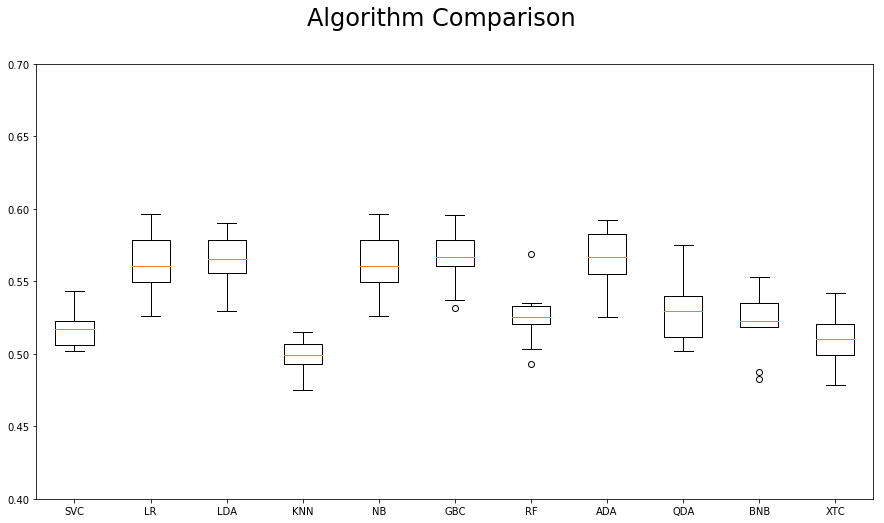

In [15]:
from sklearn.model_selection import cross_val_score


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1_micro', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(15, 8))
fig.suptitle('Algorithm Comparison', fontsize=24)
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
plt.ylim([0.40,0.70])
ax.set_xticklabels(names)
plt.show()

## Computing best features
Before starting the tuning phase, we chose the best number of features for each classifier and we plotted the best (mean) performances that we could observe performing a complete exploration of all the possibilities.

MODEL: LR, AVG_SCORE: 0.5676458240428952, NUM_FEAT: 25
MODEL: LDA, AVG_SCORE: 0.5671991466270421, NUM_FEAT: 15
MODEL: KNN, AVG_SCORE: 0.543182891931287, NUM_FEAT: 18
MODEL: NB, AVG_SCORE: 0.5569186880200305, NUM_FEAT: 2
MODEL: GBC, AVG_SCORE: 0.5838469486099515, NUM_FEAT: 27
MODEL: RF, AVG_SCORE: 0.5596064881508012, NUM_FEAT: 25
MODEL: ADA, AVG_SCORE: 0.577141792379374, NUM_FEAT: 27
MODEL: QDA, AVG_SCORE: 0.559381656373995, NUM_FEAT: 6
MODEL: BNB, AVG_SCORE: 0.5620603519434736, NUM_FEAT: 2
MODEL: XTC, AVG_SCORE: 0.5523421677658102, NUM_FEAT: 2


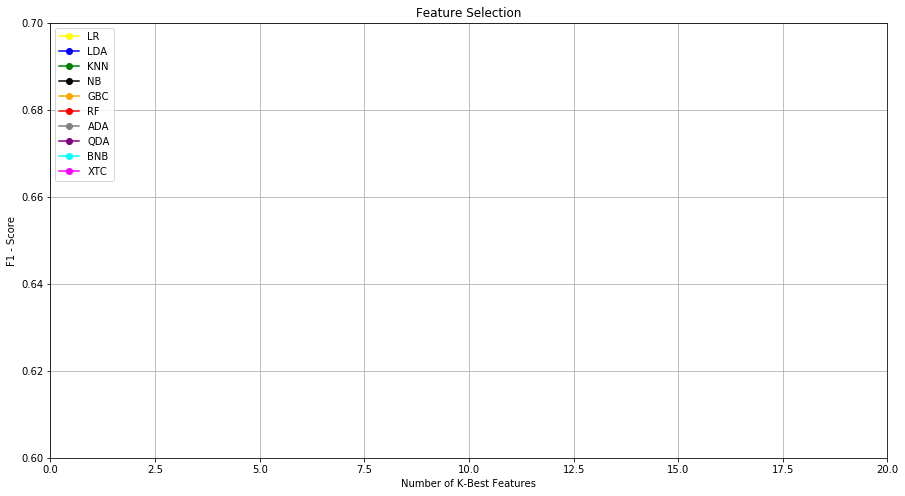

In [32]:
models = []
models.append(('LR', lr, 'Yellow'))
models.append(('LDA', lda, 'Blue'))
models.append(('KNN', knn, 'Green'))
models.append(('NB', nb, 'Black'))
models.append(('GBC', gbc, 'Orange'))
models.append(('RF', rf, 'Red'))
models.append(('ADA', ada, 'Grey'))
models.append(('QDA', qda, 'Purple'))
models.append(('BNB', bnb, 'Cyan'))
models.append(('XTC', xtc, 'Magenta'))

n = ['LR','LDA','KNN','NB','GBC','RF','ADA','QDA','BNB','XTC']
n_number = np.arange(2,30,1)
# Transforming the lists into array for plotting
plt.figure(figsize=(20, 10))
plt.title('Feature Selection')
plt.xlabel("Number of K-Best Features")
plt.ylabel("F1 - Score")
plt.grid()

num_feat_arr = []
for name, model, c in models:
    
    scores = [0, 0]
    results = []

    for n in range(2,30):

        selection = SelectKBest(k=n).fit(X_train,y_train)
        X_k = selection.transform(X_train)
        # Splitting the dataset into the Training set and Test set
        
        
        # Feature Scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_k = sc.fit_transform(X_k)
        
        score = cross_val_score(estimator = model, X = X_k, y = y_train, cv = 10, scoring='f1_micro')
        f1 = score.mean()
        
        results.append(f1)
        
        std = score.std()
        if scores[0] < f1:
            scores = [f1, n]
  
    plt.plot(n_number, results, 'o-', color=c, label=name)
    
    num_feat_arr.append(scores[1])
    max_avg = np.average(scores)
    
    print("Model: %s, Avg_Score: %.3f, Num_Feat: %d" % (name, scores[0], scores[1]))  


plt.axis([0, 30 , 0.45, 0.70])
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

No handles with labels found to put in legend.


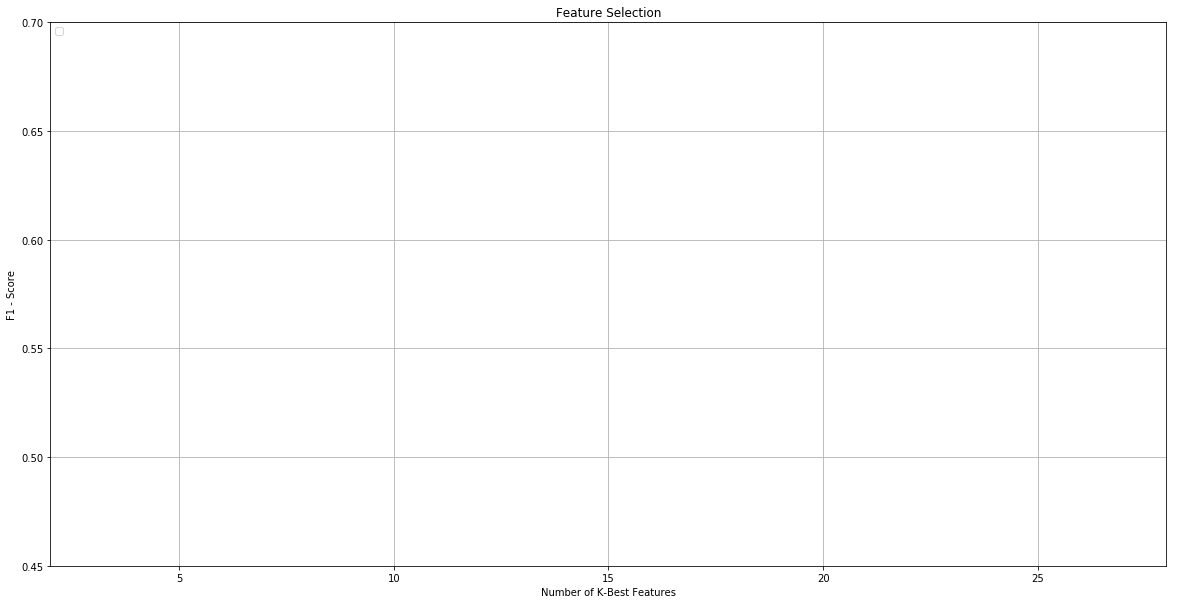

In [42]:
plt.figure(figsize=(20, 10))
plt.title('Feature Selection')
plt.xlabel("Number of K-Best Features")
plt.ylabel("F1 - Score")
plt.grid()
plt.axis([2, 28 , 0.45, 0.70])
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

classifier = SVC(kernel='poly')

degree = np.arange(3,12,1)
probability = (True, False)
C = np.arange(10,100,20)

parameters = [{
    'degree':degree,
    'C':C,
    'probability':probability
               }]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring='f1_micro',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_f1)
print(best_parameters)

In [82]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import Adam

In [83]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [103]:
from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(4, num_classes=None)

In [112]:
neurons = 512
batch_size = 256         
epochs = 800
output_size = 4
loss = 'sparse_categorical_crossentropy'
learning_rate = 0.1
optimizer= Adam(learning_rate)

# Build a simple network
neural_network = Sequential()
neural_network.add(Dense(neurons, input_shape=(X_train.shape[1],), activation='sigmoid'))
neural_network.add(Dropout(0.3))
neural_network.add(Dense(units=output_size))
# Compile the network
neural_network.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [113]:
neural_network.fit(X_train, y_train, validation_data=(X_val, y_val), nb_epoch=epochs, batch_size=batch_size)

Train on 8335 samples, validate on 616 samples
Epoch 1/800
8335/8335 [==============================] - 2s 216us/step - loss: 5.1653 - acc: 0.5491 - val_loss: 4.6442 - val_acc: 0.5925
Epoch 2/800
8335/8335 [==============================] - 0s 18us/step - loss: 4.9649 - acc: 0.5598 - val_loss: 4.6442 - val_acc: 0.5925
Epoch 3/800
8335/8335 [==============================] - 0s 18us/step - loss: 4.9649 - acc: 0.5598 - val_loss: 4.6442 - val_acc: 0.5925
Epoch 4/800
8335/8335 [==============================] - 0s 18us/step - loss: 4.9649 - acc: 0.5598 - val_loss: 4.6442 - val_acc: 0.5925
Epoch 5/800
8335/8335 [==============================] - 0s 18us/step - loss: 4.9649 - acc: 0.5598 - val_loss: 4.6442 - val_acc: 0.5925
Epoch 6/800
8335/8335 [==============================] - 0s 19us/step - loss: 4.9649 - acc: 0.5598 - val_loss: 4.6442 - val_acc: 0.5925
Epoch 7/800
8335/8335 [==============================] - 0s 18us/step - loss: 4.9649 - acc: 0.5598 - val_loss: 4.6442 - val_acc: 0.5925


KeyboardInterrupt: 